In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
#For the Watchfree null duration and detection KPI 
wf = pd.read_csv("WatchfreeKPI.csv")
wf.head(10)

,calendar_date,total_cont_dur,null_cont_dur,null_content_dur_perc,null_rec_count_perc
0,2023-06-13 00:00:00.000000,3112872633,1110497461,35.674362,39.542067
1,2023-06-12 00:00:00.000000,3162769737,1265256688,40.004705,41.260896
2,2023-06-11 00:00:00.000000,3157448911,1221296267,38.679843,41.214168
3,2023-06-10 00:00:00.000000,3173203344,1432091345,45.130778,46.739912
4,2023-06-09 00:00:00.000000,3131059428,1475910975,47.137750,48.713083
5,2023-06-08 00:00:00.000000,3010286847,1370873617,45.539634,46.349459
6,2023-06-07 00:00:00.000000,3049090860,1057139960,34.670661,36.146508
7,2023-06-06 00:00:00.000000,3173855670,1000547542,31.524670,33.384187
8,2023-06-05 00:00:00.000000,3258918037,945576283,29.015037,31.707598
9,2023-06-04 00:00:00.000000,3297853390,1015714818,30.799271,33.982189


In [3]:
wf['calendar_date'] = pd.to_datetime(wf['calendar_date'])
wf['week'] = wf['calendar_date'].dt.week


# Check the updated data types
print(wf.dtypes)
wf.head(10)

calendar_date            datetime64[ns]
total_cont_dur                    int64
null_cont_dur                     int64
null_content_dur_perc           float64
null_rec_count_perc             float64
week                              int64
dtype: object


/var/folders/8_/hhlpy30n5ll_w5fz1k_r7qqm0000gp/T/ipykernel_3443/4185302552.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  wf['week'] = wf['calendar_date'].dt.week


,calendar_date,total_cont_dur,null_cont_dur,null_content_dur_perc,null_rec_count_perc,week
0,2023-06-13,3112872633,1110497461,35.674362,39.542067,24
1,2023-06-12,3162769737,1265256688,40.004705,41.260896,24
2,2023-06-11,3157448911,1221296267,38.679843,41.214168,23
3,2023-06-10,3173203344,1432091345,45.130778,46.739912,23
4,2023-06-09,3131059428,1475910975,47.137750,48.713083,23
5,2023-06-08,3010286847,1370873617,45.539634,46.349459,23
6,2023-06-07,3049090860,1057139960,34.670661,36.146508,23
7,2023-06-06,3173855670,1000547542,31.524670,33.384187,23
8,2023-06-05,3258918037,945576283,29.015037,31.707598,23
9,2023-06-04,3297853390,1015714818,30.799271,33.982189,22


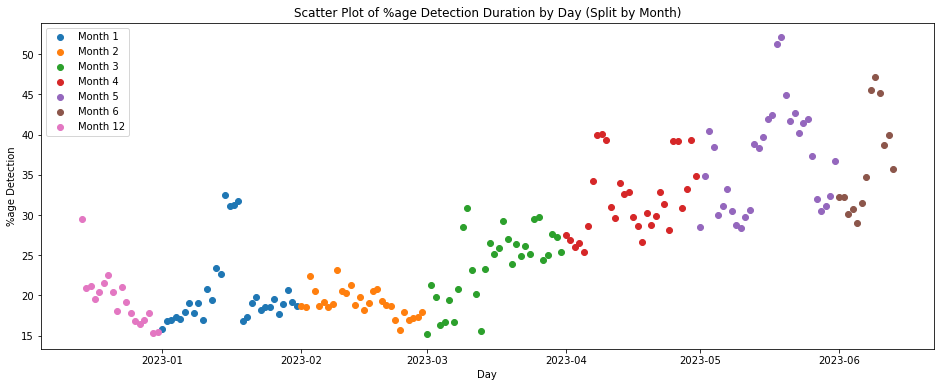

In [4]:
# Group the data by month
groups = wf.groupby(wf['calendar_date'].dt.month)

# Plot scatter plot for each month
plt.figure(figsize=(16, 6))
for month, group in groups:
    plt.scatter(group['calendar_date'], group['null_content_dur_perc'], label=f'Month {month}')

plt.xlabel('Day')
plt.ylabel('%age Detection')
plt.title('Scatter Plot of %age Detection Duration by Day (Split by Month)')
plt.legend()
plt.show()

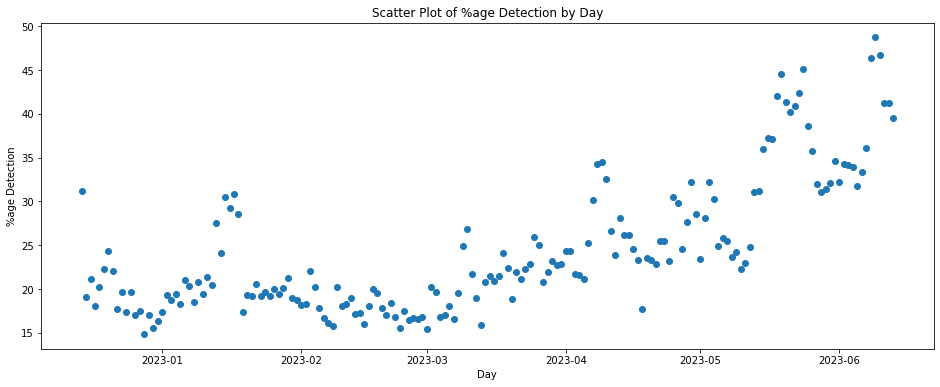

In [5]:
# Plotting the scatter plot for null_content_record_percentage
plt.figure(figsize=(16 , 6))
plt.scatter(wf['calendar_date'], wf['null_rec_count_perc'])
plt.xlabel('Day')
plt.ylabel('%age Detection')
plt.title('Scatter Plot of %age Detection by Day')
plt.show()

#### Did we make changes in April'23? The nulls start rising in April and the distribution is also more spread from April.

In [6]:
# Filter for the month of April 2023
past_date = wf[(wf['calendar_date'].dt.month.isin([4])) & (wf['calendar_date'].dt.year == 2023)]


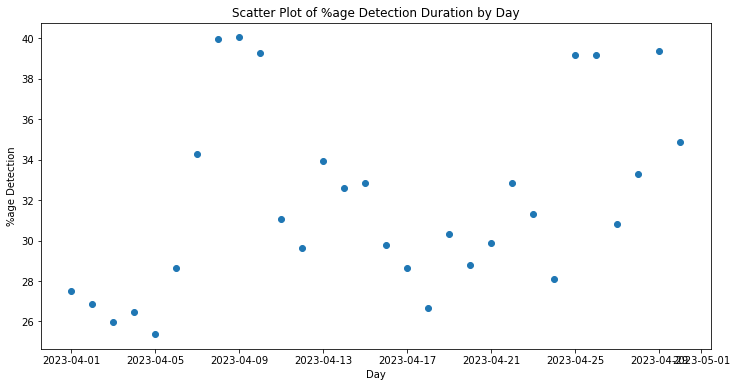

In [7]:
# Plotting the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(past_date['calendar_date'], past_date['null_content_dur_perc'])
plt.xlabel('Day')
plt.ylabel('%age Detection')
plt.title('Scatter Plot of %age Detection Duration by Day')
plt.show()

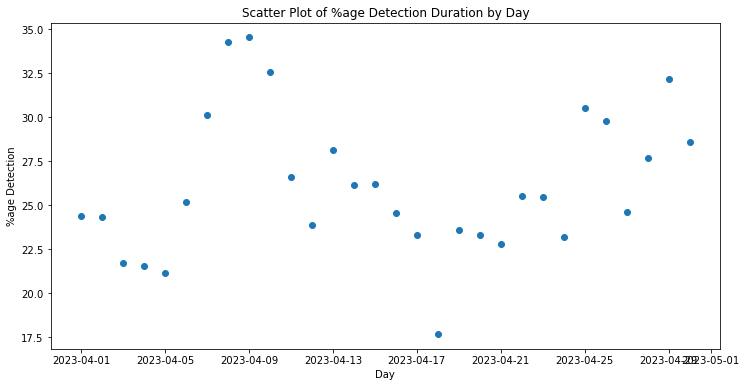

In [8]:
# Plotting the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(past_date['calendar_date'], past_date['null_rec_count_perc'])
plt.xlabel('Day')
plt.ylabel('%age Detection')
plt.title('Scatter Plot of %age Detection Duration by Day')
plt.show()

In [9]:
# Filter the data from April 11 to May 14 which is our new normal
filtered_df = wf[(wf['calendar_date'] >= '2023-04-11') & (wf['calendar_date'] <= '2023-05-14')]
filtered_df.head()

,calendar_date,total_cont_dur,null_cont_dur,null_content_dur_perc,null_rec_count_perc,week
30,2023-05-14,2798293184,1071593527,38.294541,31.213498,19
31,2023-05-13,2818235003,1095522641,38.872650,31.116438,19
32,2023-05-12,2898587944,886868313,30.596564,24.828132,19
33,2023-05-11,2901694754,862420401,29.721265,22.933982,19
34,2023-05-10,2858871127,812319697,28.414002,22.306318,19


## Plotting the spread of these values with against average and standard deviation for 1 month

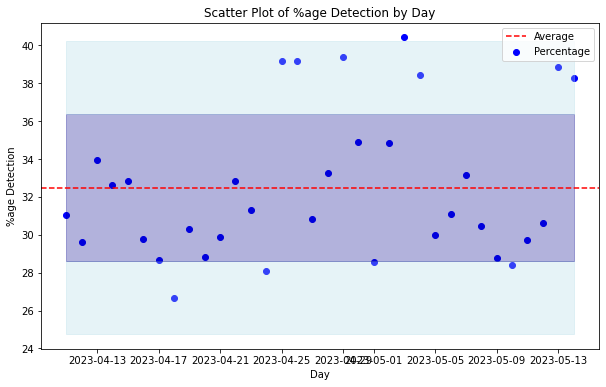

In [10]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))

#Add the average and standard deviaton
avg = np.mean(filtered_df['null_content_dur_perc'])
std_dev = np.std(filtered_df['null_content_dur_perc'])



lower_bound = avg - std_dev
upper_bound = avg + std_dev
lower_bound2 = avg - 2 * std_dev
upper_bound2 = avg + 2 * std_dev
lower_bound3 = avg - 3 * std_dev
upper_bound3 = avg + 3 * std_dev

# Plot scatter plot
plt.scatter(filtered_df['calendar_date'], filtered_df['null_content_dur_perc'], color='blue', label='Percentage')

# Plot average line
plt.axhline(y=avg, color='red', linestyle='--', label='Average')

# Plot shaded regions for standard deviations

plt.fill_between(filtered_df['calendar_date'], lower_bound2, lower_bound, color='lightblue', alpha=0.3)
plt.fill_between(filtered_df['calendar_date'], lower_bound, upper_bound, color='darkblue', alpha=0.3)
plt.fill_between(filtered_df['calendar_date'], upper_bound, upper_bound2, color='lightblue', alpha=0.3)

plt.xlabel('Day')
plt.ylabel('%age Detection')
plt.title('Scatter Plot of %age Detection by Day')
plt.legend()
plt.show()

(array([0.02140335, 0.1284201 , 0.1712268 , 0.0856134 , 0.10701675,
        0.06421005, 0.        , 0.        , 0.06421005, 0.0856134 ]),
 array([26.67127247, 28.04543886, 29.41960526, 30.79377165, 32.16793804,
        33.54210443, 34.91627082, 36.29043721, 37.6646036 , 39.03877   ,
        40.41293639]),
 <BarContainer object of 10 artists>)

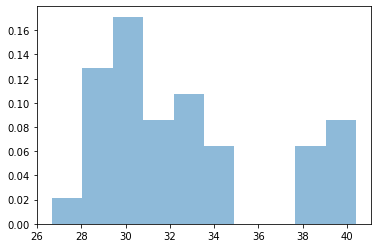

In [11]:
counts, bin_edges = np.histogram(filtered_df['null_content_dur_perc'], bins=20, density=True)
bin_widths = np.diff(bin_edges)
probability_density = counts / (len(filtered_df['null_content_dur_perc']) * bin_widths)

# Plot probability density and scatter points
fig, ax = plt.subplots()
ax.hist(filtered_df['null_content_dur_perc'], bins=10, density=True, alpha=0.5)

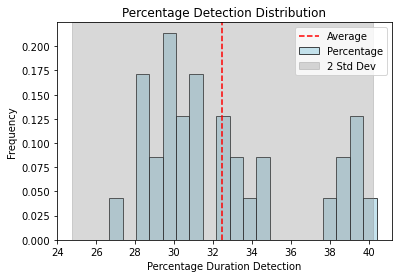

In [12]:
# Plot histogram
plt.hist(filtered_df['null_content_dur_perc'], bins=20, density=True, color='lightblue', edgecolor='black', alpha=0.7, label='Percentage')

# Plot average line
plt.axvline(x=avg, color='red', linestyle='--', label='Average')

avg = np.mean(filtered_df['null_content_dur_perc'])
std_dev = np.std(filtered_df['null_content_dur_perc'])

# Calculate upper and lower bounds for 2 standard deviations
lower_bound = avg - 2 * std_dev
upper_bound = avg + 2 * std_dev

# Plot shaded regions for 2 standard deviations
plt.axvspan(lower_bound, upper_bound, color='gray', alpha=0.3, label='2 Std Dev')

# Configure plot
plt.xlabel('Percentage Duration Detection')
plt.ylabel('Frequency')
plt.title('Percentage Detection Distribution')
plt.legend()

# Display the plot
plt.show()

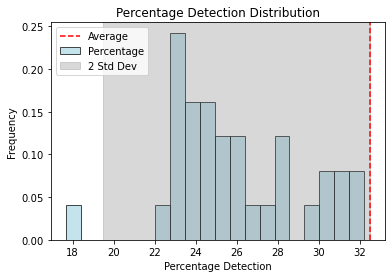

In [13]:
# Plot histogram
plt.hist(filtered_df['null_rec_count_perc'], bins=20, density=True, color='lightblue', edgecolor='black', alpha=0.7, label='Percentage')

# Plot average line
plt.axvline(x=avg, color='red', linestyle='--', label='Average')

avg = np.mean(filtered_df['null_rec_count_perc'])
std_dev = np.std(filtered_df['null_rec_count_perc'])

# Calculate upper and lower bounds for 2 standard deviations
lower_bound = avg - 2 * std_dev
upper_bound = avg + 2 * std_dev

# Plot shaded regions for 2 standard deviations
plt.axvspan(lower_bound, upper_bound, color='gray', alpha=0.3, label='2 Std Dev')

# Configure plot
plt.xlabel('Percentage Detection')
plt.ylabel('Frequency')
plt.title('Percentage Detection Distribution')
plt.legend()

# Display the plot
plt.show()

### Distribution is not normal

In [14]:
#Try loading weekly data 
#For the Watchfree null duration and detection KPI 
wf2 = pd.read_csv("Watchfree_weeklyKPI.csv")
wf2['calendar_date'] = pd.to_datetime(wf2['calendar_date'])
wf2['week'] = wf2['calendar_date'].dt.week


# Check the updated data types
print(wf2.dtypes)
wf2.head(10)

calendar_date            datetime64[ns]
total_cont_dur                    int64
null_cont_dur                     int64
null_content_dur_perc           float64
null_rec_count_perc             float64
week                              int64
dtype: object


/var/folders/8_/hhlpy30n5ll_w5fz1k_r7qqm0000gp/T/ipykernel_3443/1080708191.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  wf2['week'] = wf2['calendar_date'].dt.week


,calendar_date,total_cont_dur,null_cont_dur,null_content_dur_perc,null_rec_count_perc,week
0,2023-06-14 15:00:00,163042553,77506176,47.537391,45.909669,24
1,2023-06-14 14:00:00,146379272,66658145,45.537967,38.286417,24
2,2023-06-14 13:00:00,124872929,49965679,40.013219,43.204709,24
3,2023-06-14 12:00:00,100470787,41842353,41.646288,44.522112,24
4,2023-06-14 11:00:00,94901878,38544805,40.615429,44.411921,24
5,2023-06-14 10:00:00,74331863,34356367,46.220242,49.646169,24
6,2023-06-14 09:00:00,69975770,27582688,39.417484,43.808508,24
7,2023-06-14 08:00:00,70913019,25579274,36.071337,34.535273,24
8,2023-06-14 07:00:00,77077355,27498096,35.675973,39.704682,24
9,2023-06-14 06:00:00,78917870,29819095,37.784972,43.281926,24


,calendar_date,total_cont_dur,null_cont_dur,null_content_dur_perc,null_rec_count_perc,week
759,2023-05-14 00:00:00,139803597,57050122,40.807335,31.460595,19
760,2023-05-13 23:00:00,138482641,56805560,41.019986,32.111007,19
761,2023-05-13 22:00:00,134768448,56684436,42.060613,32.572233,19
762,2023-05-13 21:00:00,137021172,59239773,43.234029,34.323396,19
763,2023-05-13 20:00:00,134682834,59002427,43.808424,33.782932,19


(array([0.02188503, 0.08647255, 0.11849942, 0.07045911, 0.03362821,
        0.02135125, 0.0197499 , 0.03149309, 0.01547965, 0.00427025]),
 array([24.06942722, 26.43188231, 28.79433739, 31.15679247, 33.51924755,
        35.88170264, 38.24415772, 40.6066128 , 42.96906788, 45.33152297,
        47.69397805]),
 <BarContainer object of 10 artists>)

<Figure size 720x432 with 0 Axes>

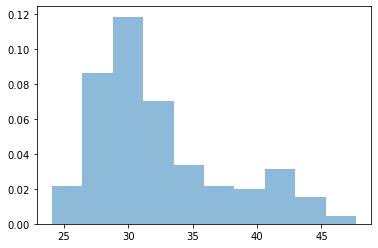

In [15]:
# Filter for the normal months
past_date2 = wf2[(wf2['calendar_date'] >= '2023-04-11') & (wf2['calendar_date'] <= '2023-05-14')]

# Print the filtered DataFrame
display(past_date2.head())

# Plotting the scatter plot
plt.figure(figsize=(10, 6))

counts, bin_edges = np.histogram(past_date2['null_content_dur_perc'], bins=10, density=True)
bin_widths = np.diff(bin_edges)
probability_density = counts / (len(past_date2['null_content_dur_perc']) * bin_widths)

# Plot probability density and scatter points
fig, ax = plt.subplots()
ax.hist(past_date2['null_content_dur_perc'], bins=10, density=True, alpha=0.5)

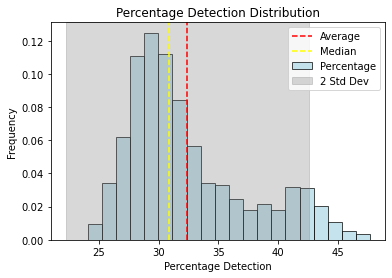

In [16]:
# Plot histogram
plt.hist(past_date2['null_content_dur_perc'], bins=20, density=True, color='lightblue', edgecolor='black', alpha=0.7, label='Percentage')

#Add the average and standard deviaton
avg2 = np.mean(past_date2['null_content_dur_perc'])
std_dev2 = np.std(past_date2['null_content_dur_perc'])
median2 = past_date2['null_content_dur_perc'].median()


# Plot average line
plt.axvline(x=avg2, color='red', linestyle='--', label='Average')
plt.axvline(x=median2, color='yellow', linestyle='--', label='Median')

# Calculate upper and lower bounds for 2 standard deviations
lower_bound2 = avg2 - 2 * std_dev2
upper_bound2 = avg2 + 2 * std_dev2

# Plot shaded regions for 2 standard deviations
plt.axvspan(lower_bound2, upper_bound2, color='gray', alpha=0.3, label='2 Std Dev')

# Configure plot
plt.xlabel('Percentage Detection')
plt.ylabel('Frequency')
plt.title('Percentage Detection Distribution')
plt.legend()

# Display the plot
plt.show()

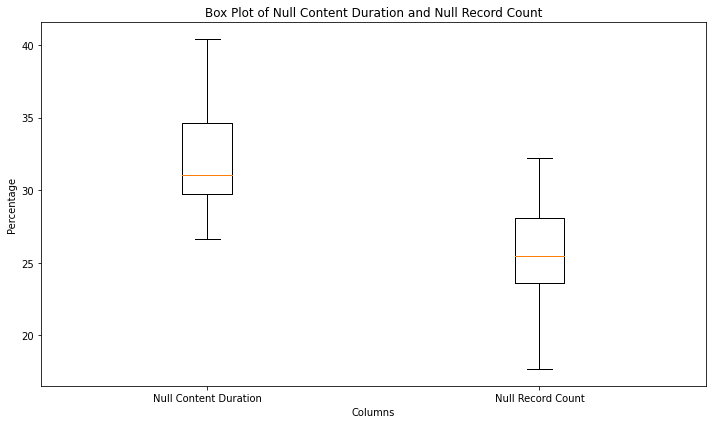

In [17]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a box plot
boxplot_data = [filtered_df['null_content_dur_perc'], filtered_df['null_rec_count_perc']]
ax.boxplot(boxplot_data, labels=['Null Content Duration', 'Null Record Count'])

# Set axis labels and title
ax.set_xlabel('Columns')
ax.set_ylabel('Percentage')
ax.set_title('Box Plot of Null Content Duration and Null Record Count')

# Adjust the layout to prevent labels from being cut off
plt.tight_layout()

# Show the plot
plt.show()

In [18]:
#For null Content Duration 
median = filtered_df['null_content_dur_perc'].median()
q1 = filtered_df['null_content_dur_perc'].quantile(0.25)
q3 = filtered_df['null_content_dur_perc'].quantile(0.75)
print(median, q1, q3)

31.055643482971284 29.740446577300357 34.62883147383015


In [19]:
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(iqr, lower_bound, upper_bound)

4.888384896529789 22.407869232505675 41.96140881862483


In [20]:
filtered_df['is_outlier_null_dur'] = (filtered_df['null_content_dur_perc'] < lower_bound) | (filtered_df['null_content_dur_perc'] > upper_bound)

/var/folders/8_/hhlpy30n5ll_w5fz1k_r7qqm0000gp/T/ipykernel_3443/4258194231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['is_outlier_null_dur'] = (filtered_df['null_content_dur_perc'] < lower_bound) | (filtered_df['null_content_dur_perc'] > upper_bound)


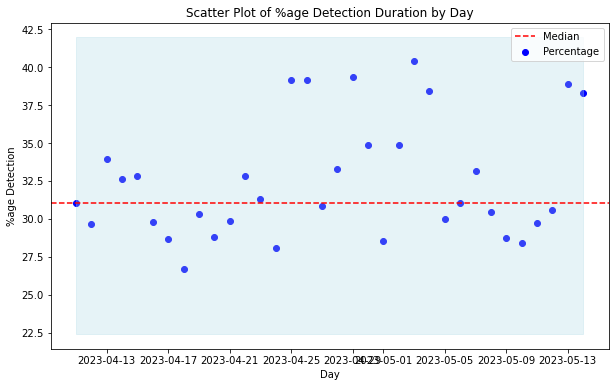

In [21]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))

#Add the average and standard deviaton
median = filtered_df['null_content_dur_perc'].median()
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Plot scatter plot
plt.scatter(filtered_df['calendar_date'], filtered_df['null_content_dur_perc'], color='blue', label='Percentage')

# Plot average line
plt.axhline(y=median, color='red', linestyle='--', label='Median')

# Plot shaded regions for standard deviations

plt.fill_between(filtered_df['calendar_date'], lower_bound, upper_bound, color='lightblue', alpha=0.3)


plt.xlabel('Day')
plt.ylabel('%age Detection')
plt.title('Scatter Plot of %age Detection Duration by Day')
plt.legend()
plt.show()

In [22]:
#Use the same threshold to see how it works on newer data and what are the outliers
new_df = wf[(wf['calendar_date'] >= '2023-05-14')]
new_df.head(10)

,calendar_date,total_cont_dur,null_cont_dur,null_content_dur_perc,null_rec_count_perc,week
0,2023-06-13,3112872633,1110497461,35.674362,39.542067,24
1,2023-06-12,3162769737,1265256688,40.004705,41.260896,24
2,2023-06-11,3157448911,1221296267,38.679843,41.214168,23
3,2023-06-10,3173203344,1432091345,45.130778,46.739912,23
4,2023-06-09,3131059428,1475910975,47.137750,48.713083,23
5,2023-06-08,3010286847,1370873617,45.539634,46.349459,23
6,2023-06-07,3049090860,1057139960,34.670661,36.146508,23
7,2023-06-06,3173855670,1000547542,31.524670,33.384187,23
8,2023-06-05,3258918037,945576283,29.015037,31.707598,23
9,2023-06-04,3297853390,1015714818,30.799271,33.982189,22


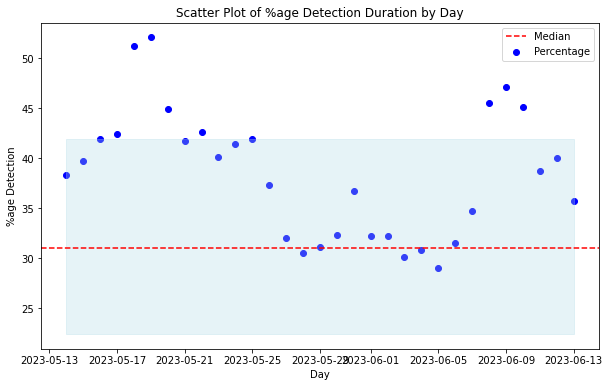

In [23]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))

# Plot scatter plot
plt.scatter(new_df['calendar_date'], new_df['null_content_dur_perc'], color='blue', label='Percentage')

# Plot average line
plt.axhline(y=median, color='red', linestyle='--', label='Median')

# Plot shaded regions for standard deviations

plt.fill_between(new_df['calendar_date'], lower_bound, upper_bound, color='lightblue', alpha=0.3)


plt.xlabel('Day')
plt.ylabel('%age Detection')
plt.title('Scatter Plot of %age Detection Duration by Day')
plt.legend()
plt.show()

In [24]:
#Now check which dates are being flagged
new_df['is_outlier_null_dur'] = (new_df['null_content_dur_perc'] > upper_bound)

/var/folders/8_/hhlpy30n5ll_w5fz1k_r7qqm0000gp/T/ipykernel_3443/3695677518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['is_outlier_null_dur'] = (new_df['null_content_dur_perc'] > upper_bound)


In [25]:
new_df[new_df['is_outlier_null_dur'] == True]

,calendar_date,total_cont_dur,null_cont_dur,null_content_dur_perc,null_rec_count_perc,week,is_outlier_null_dur
3,2023-06-10,3173203344,1432091345,45.130778,46.739912,23,True
4,2023-06-09,3131059428,1475910975,47.137750,48.713083,23,True
5,2023-06-08,3010286847,1370873617,45.539634,46.349459,23,True
22,2023-05-22,4358744432,1858508090,42.638611,40.890451,21,True
24,2023-05-20,4392177723,1972223147,44.903082,41.401783,20,True
25,2023-05-19,4276612529,2227068473,52.075526,44.534721,20,True
26,2023-05-18,4194310539,2149220344,51.241326,42.055848,20,True
27,2023-05-17,4232179815,1796669348,42.452576,37.088351,20,True


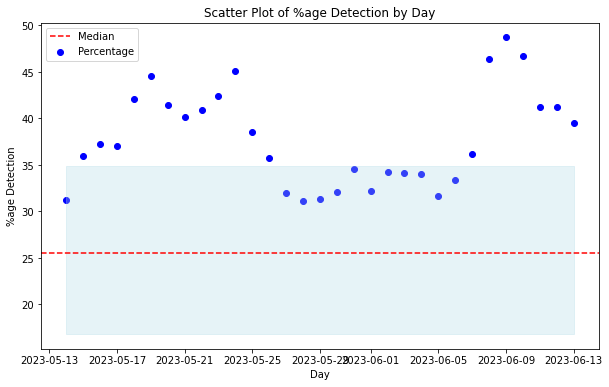

23.6029954793456 28.119393873091035 4.516398393745433 16.82839788872745 34.893991463709185


In [26]:
#Do it for null_rec_count_perc

#Add the average and standard deviaton
median = filtered_df['null_rec_count_perc'].median()
q1 = filtered_df['null_rec_count_perc'].quantile(0.25)
q3 = filtered_df['null_rec_count_perc'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

plt.figure(figsize=(10, 6))

# Plot scatter plot
plt.scatter(new_df['calendar_date'], new_df['null_rec_count_perc'], color='blue', label='Percentage')

# Plot average line
plt.axhline(y=median, color='red', linestyle='--', label='Median')

# Plot shaded regions for standard deviations

plt.fill_between(new_df['calendar_date'], lower_bound, upper_bound, color='lightblue', alpha=0.3)


plt.xlabel('Day')
plt.ylabel('%age Detection')
plt.title('Scatter Plot of %age Detection by Day')
plt.legend()
plt.show()
print(q1,q3,iqr,lower_bound,upper_bound)

In [27]:
new_df['is_outlier_null_ct'] = (new_df['null_rec_count_perc'] > upper_bound)
new_df[(new_df['is_outlier_null_dur'] == True) | (new_df['is_outlier_null_ct'] == True)]

/var/folders/8_/hhlpy30n5ll_w5fz1k_r7qqm0000gp/T/ipykernel_3443/3679057109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['is_outlier_null_ct'] = (new_df['null_rec_count_perc'] > upper_bound)


,calendar_date,total_cont_dur,null_cont_dur,null_content_dur_perc,null_rec_count_perc,week,is_outlier_null_dur,is_outlier_null_ct
0,2023-06-13,3112872633,1110497461,35.674362,39.542067,24,False,True
1,2023-06-12,3162769737,1265256688,40.004705,41.260896,24,False,True
2,2023-06-11,3157448911,1221296267,38.679843,41.214168,23,False,True
3,2023-06-10,3173203344,1432091345,45.130778,46.739912,23,True,True
4,2023-06-09,3131059428,1475910975,47.137750,48.713083,23,True,True
5,2023-06-08,3010286847,1370873617,45.539634,46.349459,23,True,True
6,2023-06-07,3049090860,1057139960,34.670661,36.146508,23,False,True
18,2023-05-26,3963512485,1479830886,37.336350,35.795498,21,False,True
19,2023-05-25,4316561350,1807879693,41.882405,38.597049,21,False,True
20,2023-05-24,5094953661,2110908176,41.431352,45.123417,21,False,True


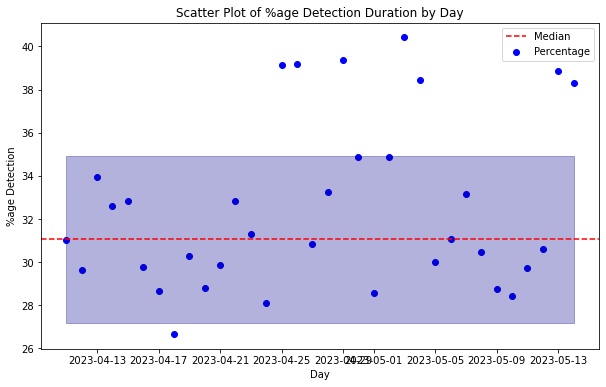

In [28]:
#Using the modified z score method
# Plotting the scatter plot
plt.figure(figsize=(10, 6))

#Add the average and standard deviaton
median = filtered_df['null_content_dur_perc'].median()
std_dev = np.std(filtered_df['null_content_dur_perc'])
lower_bound = median - std_dev
upper_bound = median + std_dev


# Plot scatter plot
plt.scatter(filtered_df['calendar_date'], filtered_df['null_content_dur_perc'], color='blue', label='Percentage')

# Plot average line
plt.axhline(y=median, color='red', linestyle='--', label='Median')

# Plot shaded regions for standard deviations

plt.fill_between(filtered_df['calendar_date'], lower_bound, upper_bound, color='darkblue', alpha=0.3)

plt.xlabel('Day')
plt.ylabel('%age Detection')
plt.title('Scatter Plot of %age Detection Duration by Day')
plt.legend()
plt.show()

In [29]:
import numpy as np

median = filtered_df['null_content_dur_perc'].median()
MAD = np.median(np.abs(filtered_df['null_content_dur_perc'] - median))
modified_z_score = 0.6745 * (filtered_df['null_content_dur_perc'] - median) / MAD


threshold = 3

# Step 4: Identify the outliers
outliers = filtered_df[np.abs(modified_z_score) > threshold]

# Step 5: Flag the outliers
filtered_df['is_outlier_dur_zmeth'] = np.where(np.abs(modified_z_score) > threshold, True, False)
filtered_df.head()

/var/folders/8_/hhlpy30n5ll_w5fz1k_r7qqm0000gp/T/ipykernel_3443/4242382134.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['is_outlier_dur_zmeth'] = np.where(np.abs(modified_z_score) > threshold, True, False)


,calendar_date,total_cont_dur,null_cont_dur,null_content_dur_perc,null_rec_count_perc,week,is_outlier_null_dur,is_outlier_dur_zmeth
30,2023-05-14,2798293184,1071593527,38.294541,31.213498,19,False,False
31,2023-05-13,2818235003,1095522641,38.872650,31.116438,19,False,False
32,2023-05-12,2898587944,886868313,30.596564,24.828132,19,False,False
33,2023-05-11,2901694754,862420401,29.721265,22.933982,19,False,False
34,2023-05-10,2858871127,812319697,28.414002,22.306318,19,False,False


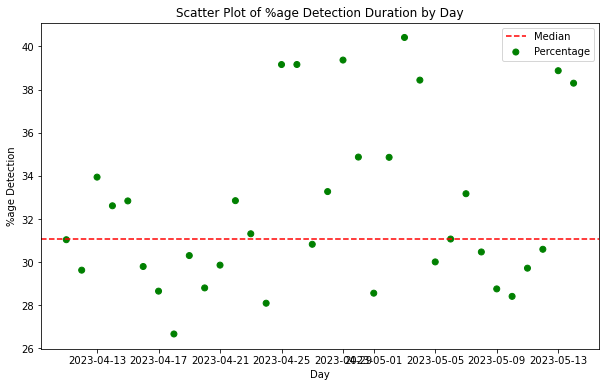

In [30]:
#Using the modified z score method
# Plotting the scatter plot
plt.figure(figsize=(10, 6))

#Add the average and standard deviaton
median = filtered_df['null_content_dur_perc'].median()
std_dev = np.std(filtered_df['null_content_dur_perc'])
lower_bound = median - std_dev
upper_bound = median + std_dev

# Set the color based on the 'is_outlier' column
colors = ['green' if not is_outlier else 'red' for is_outlier in filtered_df['is_outlier_dur_zmeth']]

# Plot scatter plot
plt.scatter(filtered_df['calendar_date'], filtered_df['null_content_dur_perc'], color=colors, label='Percentage')

# Plot average line
plt.axhline(y=median, color='red', linestyle='--', label='Median')

# Plot shaded regions for standard deviations


plt.xlabel('Day')
plt.ylabel('%age Detection')
plt.title('Scatter Plot of %age Detection Duration by Day')
plt.legend()
plt.show()

In [31]:
import numpy as np

median = filtered_df['null_content_dur_perc'].median()
MAD = np.median(np.abs(filtered_df['null_content_dur_perc'] - median))
modified_z_score = 0.6745 * (new_df['null_content_dur_perc'] - median) / MAD


threshold = 3

# Step 4: Identify the outliers
outliers = new_df[np.abs(modified_z_score) > threshold]

# Step 5: Flag the outliers
new_df['is_outlier_dur_zmeth'] = np.where(np.abs(modified_z_score) > threshold, True, False)
new_df.head()

/var/folders/8_/hhlpy30n5ll_w5fz1k_r7qqm0000gp/T/ipykernel_3443/3726027046.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['is_outlier_dur_zmeth'] = np.where(np.abs(modified_z_score) > threshold, True, False)


,calendar_date,total_cont_dur,null_cont_dur,null_content_dur_perc,null_rec_count_perc,week,is_outlier_null_dur,is_outlier_null_ct,is_outlier_dur_zmeth
0,2023-06-13,3112872633,1110497461,35.674362,39.542067,24,False,True,False
1,2023-06-12,3162769737,1265256688,40.004705,41.260896,24,False,True,False
2,2023-06-11,3157448911,1221296267,38.679843,41.214168,23,False,True,False
3,2023-06-10,3173203344,1432091345,45.130778,46.739912,23,True,True,True
4,2023-06-09,3131059428,1475910975,47.137750,48.713083,23,True,True,True


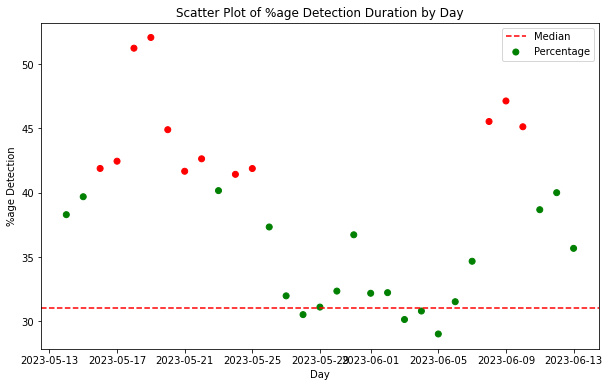

In [32]:
# For new data 

#Using the modified z score method
# Plotting the scatter plot
plt.figure(figsize=(10, 6))

#Add the average and standard deviaton
#median = filtered_df['null_content_dur_perc'].median()
#std_dev = np.std(filtered_df['null_content_dur_perc'])
#lower_bound = median - std_dev
#upper_bound = median + std_dev

# Set the color based on the 'is_outlier' column
colors = ['green' if not is_outlier else 'red' for is_outlier in new_df['is_outlier_dur_zmeth']]

# Plot scatter plot
plt.scatter(new_df['calendar_date'], new_df['null_content_dur_perc'], color=colors, label='Percentage')

# Plot average line
plt.axhline(y=median, color='red', linestyle='--', label='Median')

# Plot shaded regions for standard deviations


plt.xlabel('Day')
plt.ylabel('%age Detection')
plt.title('Scatter Plot of %age Detection Duration by Day')
plt.legend()
plt.show()